In [2]:
import pandas as pd

# Sample blog posts and categories
data = {
    "Data": [
        "AI is transforming the future of technology with rapid innovations.",
        "My trip to the Swiss Alps was breathtaking and adventurous.",
        "Try this delicious vegan lasagna recipe for a healthy dinner.",
        "10 tips to improve your mental health and well-being.",
        "The latest smartphone features a foldable display and 5G support.",
        "Exploring the ancient ruins of Rome was a magical experience.",
        "This chocolate cake is rich, moist, and perfect for celebrations.",
        "Meditation helps in reducing stress and improving focus.",
        "Top programming languages to learn in 2025 for tech jobs.",
        "Discover hidden gems in Bali for your next tropical vacation."
    ],
    "Labels": [
        "Technology", "Travel", "Food", "Health", "Technology",
        "Travel", "Food", "Health", "Technology", "Travel"
    ]
}

df = pd.DataFrame(data)
df.to_csv('blogs_categories.csv', index=False)
print("Mock dataset 'blogs_categories.csv' created successfully!")


Mock dataset 'blogs_categories.csv' created successfully!


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("blogs_categories.csv")

# Preview data
print(df.head())
print("\nCategory distribution:\n", df['Labels'].value_counts())


                                                Data      Labels
0  AI is transforming the future of technology wi...  Technology
1  My trip to the Swiss Alps was breathtaking and...      Travel
2  Try this delicious vegan lasagna recipe for a ...        Food
3  10 tips to improve your mental health and well...      Health
4  The latest smartphone features a foldable disp...  Technology

Category distribution:
 Labels
Technology    3
Travel        3
Food          2
Health        2
Name: count, dtype: int64


In [10]:
# Apply text cleaning function to clean the 'Data' column
df['cleaned'] = df['Data'].apply(clean_text)

# Check if the 'cleaned' column has been created
print(df.head())


                                                Data      Labels  \
0  AI is transforming the future of technology wi...  Technology   
1  My trip to the Swiss Alps was breathtaking and...      Travel   
2  Try this delicious vegan lasagna recipe for a ...        Food   
3  10 tips to improve your mental health and well...      Health   
4  The latest smartphone features a foldable disp...  Technology   

                                             cleaned  
0  ai transforming future technology rapid innova...  
1           trip swiss alps breathtaking adventurous  
2  try delicious vegan lasagna recipe healthy dinner  
3            10 tips improve mental health wellbeing  
4  latest smartphone features foldable display 5g...  


In [11]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned'])

# Labels (target variable)
y = df['Labels']


In [12]:
from sklearn.model_selection import train_test_split

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report with zero_division=0 (to avoid warnings)
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.0
              precision    recall  f1-score   support

      Health       0.00      0.00      0.00       0.0
  Technology       0.00      0.00      0.00       1.0
      Travel       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [17]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.3 MB/s eta 0:00:00


In [18]:
#Sentiment Analysis with TextBlob
from textblob import TextBlob

# Define a function to get sentiment polarity and subjectivity
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Get polarity and subjectivity
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Apply the function to your 'cleaned' text column
df[['Polarity', 'Subjectivity']] = df['cleaned'].apply(lambda x: pd.Series(get_sentiment(x)))

# Preview the data to see the added sentiment columns
print(df[['cleaned', 'Polarity', 'Subjectivity']].head())


                                             cleaned  Polarity  Subjectivity
0  ai transforming future technology rapid innova...      0.00         0.125
1           trip swiss alps breathtaking adventurous      0.75         0.950
2  try delicious vegan lasagna recipe healthy dinner      0.75         0.750
3            10 tips improve mental health wellbeing     -0.10         0.200
4  latest smartphone features foldable display 5g...      0.50         0.900


In [19]:
#Categorize Sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment categorization
df['Sentiment'] = df['Polarity'].apply(categorize_sentiment)

# Preview the data to see the sentiment categorization
print(df[['cleaned', 'Polarity', 'Sentiment']].head())


                                             cleaned  Polarity Sentiment
0  ai transforming future technology rapid innova...      0.00   Neutral
1           trip swiss alps breathtaking adventurous      0.75  Positive
2  try delicious vegan lasagna recipe healthy dinner      0.75  Positive
3            10 tips improve mental health wellbeing     -0.10  Negative
4  latest smartphone features foldable display 5g...      0.50  Positive


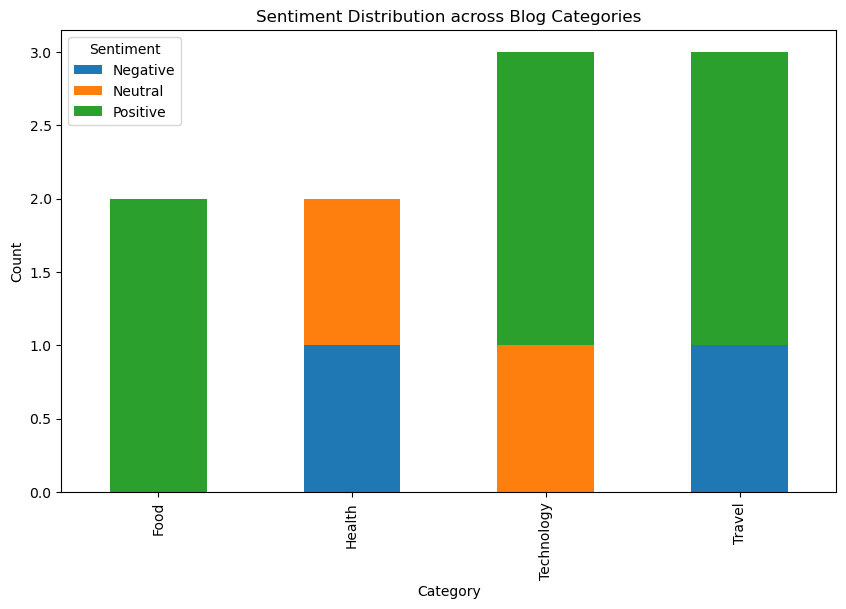

In [20]:
#Visualize Sentiment Distribution
import matplotlib.pyplot as plt

# Sentiment distribution across categories
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)

# Plot sentiment distribution across categories
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution across Blog Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()
